In [1]:
import os
import glob
import pandas as pd

import tools
from transformator import (
    relative_concentration, get_accepted_maximum_value,
    get_all_relative_concentration)
import warnings
warnings.simplefilter("ignore", UserWarning)

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = tools.get_all_data('row_data', 'txt')

data_pd = data[data['status'] == 'PD']
data_led = data[data['status'] == 'LED']

In [3]:
data.head()

,H2,CO,C2H4,C2H2,status,datetime
0,0.000224,0.000862,0.000000,0.000000,LTO,2020-01-01 00:00:00
1,0.000900,0.000848,0.000900,0.000022,LTO,2020-01-01 12:00:00
2,0.000000,0.000902,0.000045,0.000000,LTO,2020-01-02 00:00:00
3,0.000470,0.001153,0.000448,0.000000,LTO,2020-01-02 12:00:00
4,0.000065,0.000996,0.000005,0.000000,LTO,2020-01-03 00:00:00


# Дефект Низкотемпературного перегрева

In [4]:
data_lto = data[data['status'] == 'LTO']
data_normal = data[data['status'] == 'norm']
data_lto.head()

,H2,CO,C2H4,C2H2,status,datetime
0,0.000224,0.000862,0.000000,0.000000,LTO,2020-01-01 00:00:00
1,0.000900,0.000848,0.000900,0.000022,LTO,2020-01-01 12:00:00
2,0.000000,0.000902,0.000045,0.000000,LTO,2020-01-02 00:00:00
3,0.000470,0.001153,0.000448,0.000000,LTO,2020-01-02 12:00:00
4,0.000065,0.000996,0.000005,0.000000,LTO,2020-01-03 00:00:00


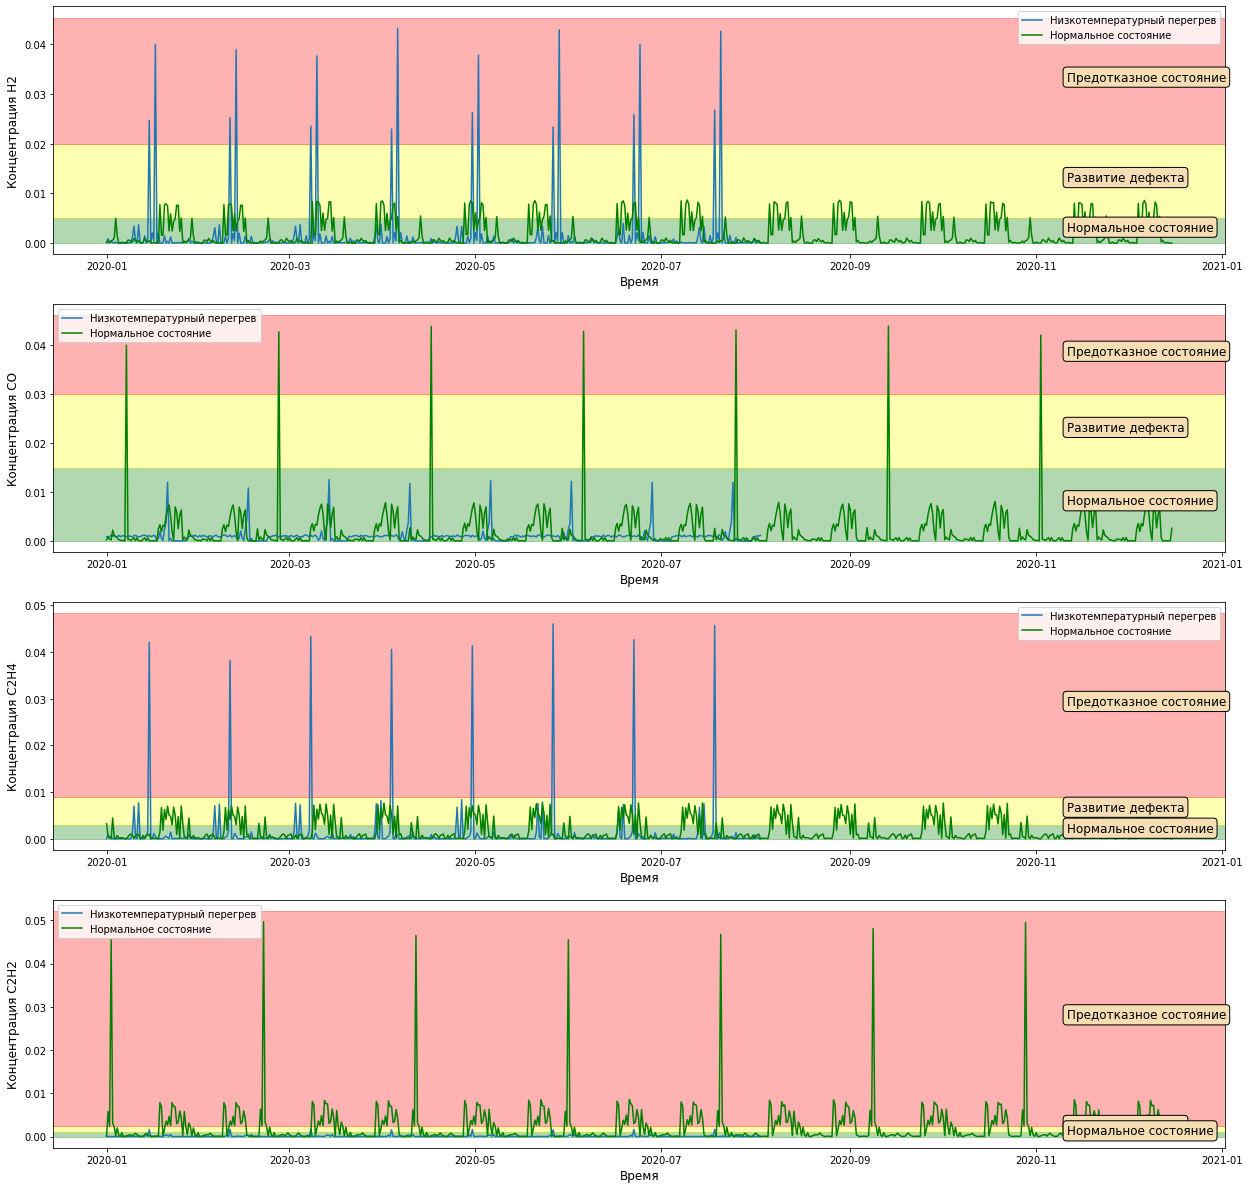

In [5]:
fig, ax = plt.subplots(4, 1, figsize=(21, 21))
props = dict(boxstyle='round', facecolor='wheat', alpha=1)

for i, gas in zip(range(0, 4), ['H2', 'CO', 'C2H4', 'C2H2']):
    
    accepted_level = get_accepted_maximum_value(gas, 0, '35kW')[0]
    maximum_level = get_accepted_maximum_value(gas, 0, '35kW')[1]
    
    max_axhspan_level = max(data_lto[gas].max(), data_normal[gas].max()) * 1.05 
    
    max_text_level = (max_axhspan_level - maximum_level) / 2 + maximum_level
    accepted_text_level = (maximum_level - accepted_level) / 2 + accepted_level
    normal_text_level = accepted_level / 2
    text_egle = round(len(data_normal['datetime']) * 0.90) 
    # Графики
    ax[i].plot(data_lto['datetime'], data_lto[gas], label='Низкотемпературный перегрев')
    ax[i].plot(data_normal['datetime'], data_normal[gas], label='Нормальное состояние', color='green') 
    # Зоны
    ax[i].axhspan(0, accepted_level, facecolor='1', color='green', alpha=0.3)
    ax[i].axhspan(accepted_level, maximum_level, facecolor='1', color='yellow', alpha=0.3)
    ax[i].axhspan(maximum_level, max_axhspan_level, facecolor='1', color='red', alpha=0.3)
    # Текст
    ax[i].text(data_normal['datetime'].iloc[text_egle], max_text_level, "Предотказное состояние", fontsize=12, color='black',
              bbox=props)
    ax[i].text(data_normal['datetime'].iloc[text_egle], accepted_text_level, "Развитие дефекта", fontsize=12, color='black',
              bbox=props)
    ax[i].text(data_normal['datetime'].iloc[text_egle], normal_text_level, "Нормальное состояние", fontsize=12, color='black',
              bbox=props)
    ax[i].set_xlabel("Время", fontsize=12)
    ax[i].set_ylabel(f'Концентрация {gas}', fontsize=12)
    ax[i].legend()

plt.show()

In [6]:
df_relative_conc = get_all_relative_concentration(data_lto[['H2', 'CO', 'C2H4', 'C2H2']])
df_relative_conc.head()

,H2,CO,C2H4,C2H2
0,0.0448,0.057457,0.000000,0.000
1,0.1800,0.056563,0.300000,0.022
2,0.0000,0.060102,0.015000,0.000
3,0.0940,0.076867,0.149333,0.000
4,0.0130,0.066426,0.001667,0.000


In [7]:
import numpy as np

26 days 12:00:00
26 days 12:00:00
26 days 12:00:00
26 days 12:00:00
50 days 00:00:00
50 days 00:00:00
50 days 00:00:00
50 days 00:00:00


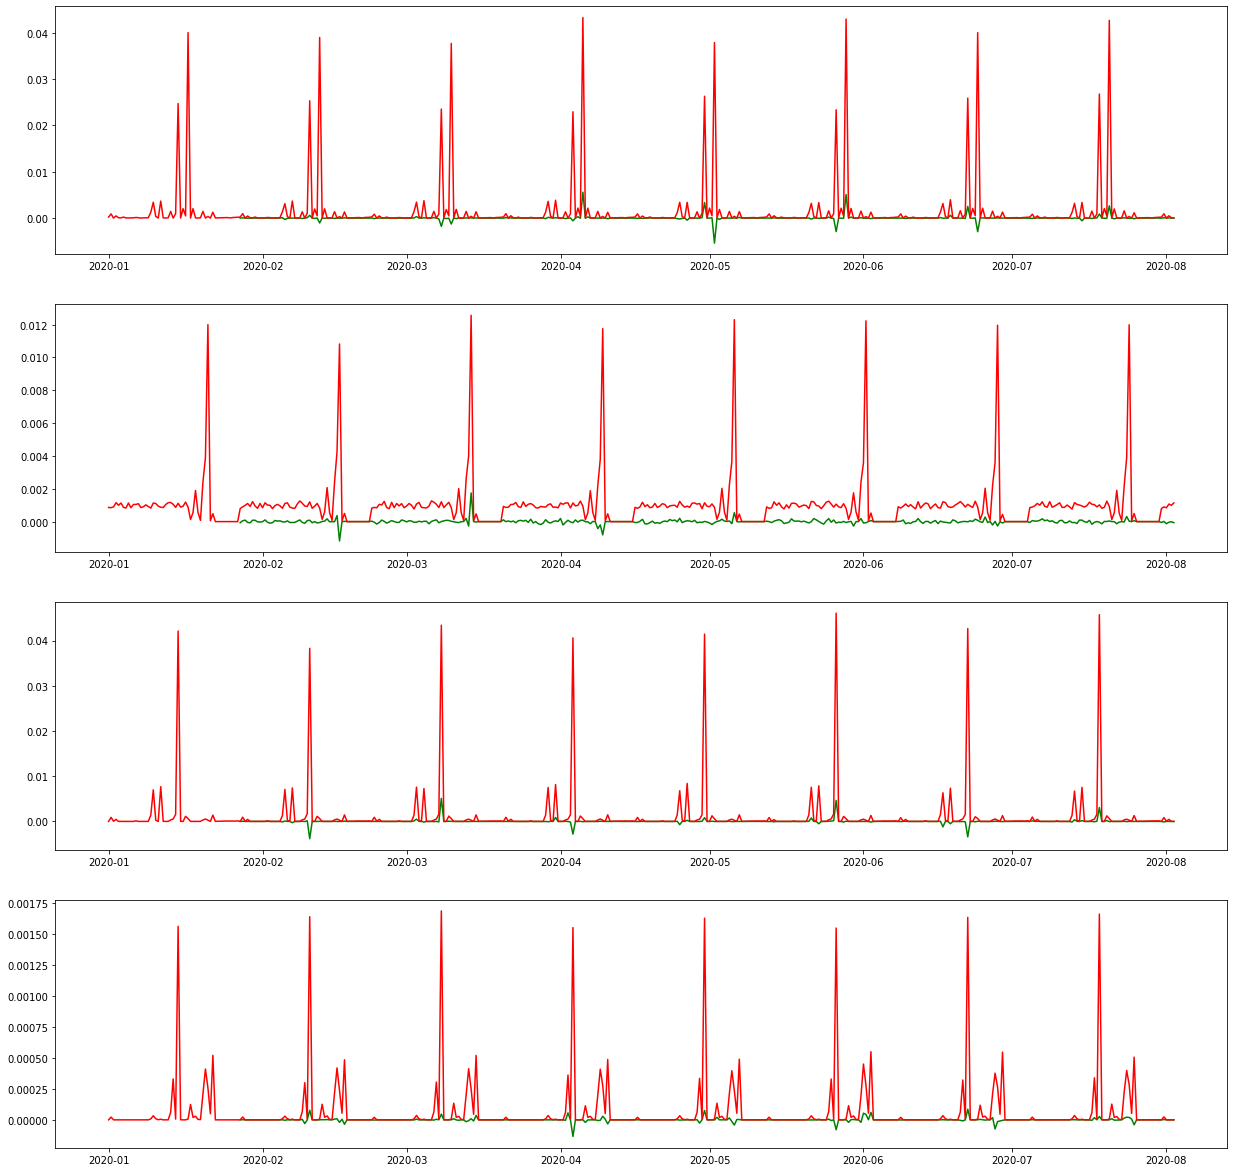

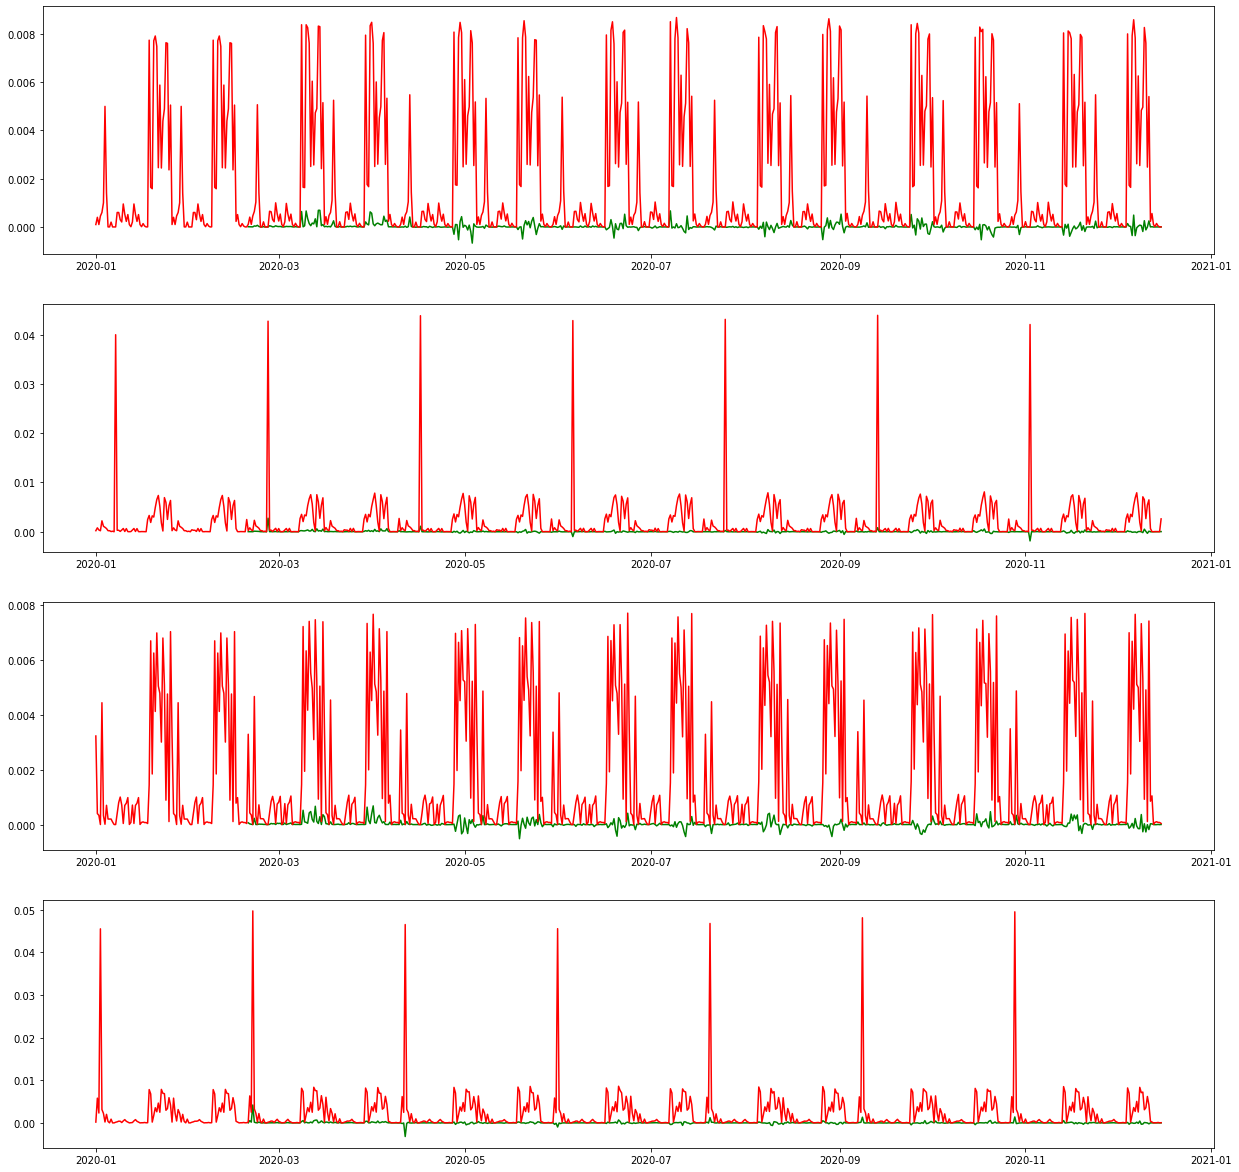

In [8]:
fig, ax = plt.subplots(4, 1, figsize=(21, 21))
props = dict(boxstyle='round', facecolor='wheat', alpha=1)

for i, gas in zip(range(0, 4), ['H2', 'CO', 'C2H4', 'C2H2']):
    corr=np.correlate(data_lto[gas],data_lto[gas],'same')
    delay_1,delay_2 = data_lto['datetime'].index[np.argsort(-corr)[0]],data_lto['datetime'].index[np.argsort(-corr)[1]]
    time_shift=np.abs(data_lto['datetime'][delay_2]-data_lto['datetime'][delay_1])
    print(time_shift)
    findlay=np.abs(delay_2-delay_1)
    ax[i].plot(data_lto['datetime'], data_lto[gas].diff(findlay), label='Нормальное состояние', color='green')
#     ax[i].plot(data_normal['datetime'], np.correlate(data_normal[gas],data_normal[gas],'same'), label='Нормальное состояние', color='blue')
    ax[i].plot(data_lto['datetime'], data_lto[gas], label='Нормальное состояние', color='red')\
    
    

fig, ax = plt.subplots(4, 1, figsize=(21, 21))
props = dict(boxstyle='round', facecolor='wheat', alpha=1)
for i, gas in zip(range(0, 4), ['H2', 'CO', 'C2H4', 'C2H2']):
    corr=np.correlate(data_normal[gas],data_normal[gas],'same')
    delay_1,delay_2 = data_normal['datetime'].index[np.argsort(-corr)[0]],data_normal['datetime'].index[np.argsort(-corr)[1]]
    time_shift=np.abs(data_normal['datetime'][delay_2]-data_normal['datetime'][delay_1])
    print(time_shift)
    findlay=np.abs(delay_2-delay_1)
    ax[i].plot(data_normal['datetime'], data_normal[gas].diff(findlay), label='Нормальное состояние', color='green')
#     ax[i].plot(data_normal['datetime'], np.correlate(data_normal[gas],data_normal[gas],'same'), label='Нормальное состояние', color='blue')
    ax[i].plot(data_normal['datetime'], data_normal[gas], label='Нормальное состояние', color='red')

ARIMA

In [9]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
import warnings
from itertools import product

def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

In [10]:
data_normal.reset_index(inplace=True)
data_normal = data_normal.set_index('datetime')

<Figure size 1512x1512 with 0 Axes>

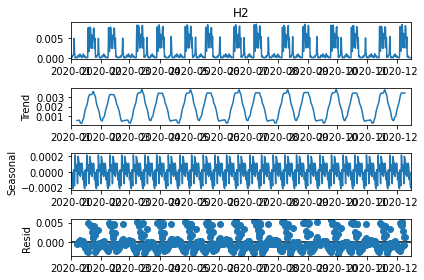

<Figure size 1512x1512 with 0 Axes>

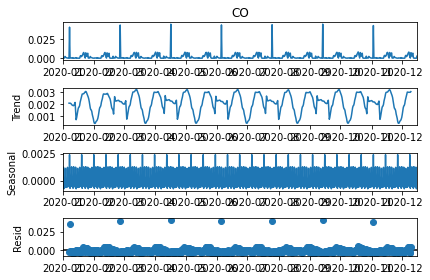

<Figure size 1512x1512 with 0 Axes>

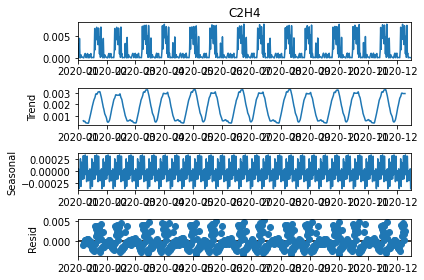

<Figure size 1512x1512 with 0 Axes>

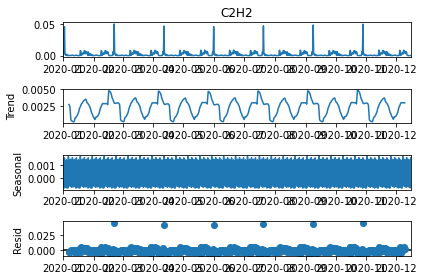

In [11]:
for i, gas in enumerate (['H2', 'CO', 'C2H4', 'C2H2']):
    plt.figure(figsize=(21, 21))
    sm.tsa.seasonal_decompose(data_normal[gas]).plot()
    plt.show()



In [12]:
for i, gas in zip(range(0, 4), ['H2', 'CO', 'C2H4', 'C2H2']):
    print("Dickey-Fuller test %s" %gas,sm.tsa.stattools.adfuller(data_normal[gas]))

Dickey-Fuller test H2 (-6.278557612116974, 3.8465493636062586e-08, 20, 679, {'1%': -3.4400174432106305, '5%': -2.8658060125001295, '10%': -2.569041777564251}, -6615.965576662012)
Dickey-Fuller test CO (-11.510051223751194, 4.281632466631617e-21, 20, 679, {'1%': -3.4400174432106305, '5%': -2.8658060125001295, '10%': -2.569041777564251}, -5459.4825359953875)
Dickey-Fuller test C2H4 (-8.439982076949795, 1.7739696018173883e-13, 15, 684, {'1%': -3.439946506895534, '5%': -2.8657747597081404, '10%': -2.5690251267911495}, -6796.6264763769805)
Dickey-Fuller test C2H2 (-15.073662372573626, 8.652371351178878e-28, 1, 698, {'1%': -3.439753311961436, '5%': -2.8656896390914217, '10%': -2.568979777013325}, -5302.348050214006)


In [20]:
mindfGas=pd.DataFrame()
for i, gas in enumerate (['H2', 'CO', 'C2H4', 'C2H2'][:1]):
    print('----------------------------------------------------\nGAS %s'%gas)
    df=pd.DataFrame(columns=['aic','param','param_seasonal'])
    p = d = q = range(0, 2)
    pdq = list(product(p, d, q))
    corr=np.correlate(data_normal[gas],data_normal[gas],'same')
    argsort=np.argsort(-corr)
    delay_1,delay_2 = argsort[0],argsort[1]
    findlay=np.abs(delay_2-delay_1)
    print('Time lag',findlay)
    seasonal_pdq = [(x[0], x[1], x[2], 7) for x in pdq]
    warnings.filterwarnings("ignore") 
    aics=[]
    params=[]
    param_seasonals=[]
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(data_normal[gas],
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                
                print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
                aics.append(results.aic)
                params.append(param)
                param_seasonals.append(param_seasonal)
            except BaseException as e :
                continue
    df=pd.DataFrame([aics,params,param_seasonals],columns=['aic','param','param_seasonal']).T
    print(df.head())
    minaic_param=df[df.aic == df.aic.min()]
    print(minaic_param)
    mindfGas[gas]=minaic_param.loc[0]

----------------------------------------------------
GAS H2
Time lag 100
ARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC:-5982.995603612727
ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC:-6189.127176723119
ARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC:-5972.871196630982
ARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC:-5945.993351316452
ARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC:-6163.328592266045
ARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC:-6154.35869532602
ARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC:-5925.308130149244
ARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC:-5943.514967587063
ARIMA(0, 0, 1)x(0, 0, 0, 7) - AIC:-6246.080522774303
ARIMA(0, 0, 1)x(0, 0, 1, 7) - AIC:-6430.280461777833
ARIMA(0, 0, 1)x(0, 1, 0, 7) - AIC:-6252.004810943013
ARIMA(0, 0, 1)x(0, 1, 1, 7) - AIC:-6224.190062597219
ARIMA(0, 0, 1)x(1, 0, 0, 7) - AIC:-6433.803151144474
ARIMA(0, 0, 1)x(1, 0, 1, 7) - AIC:-6413.792303025463
ARIMA(0, 0, 1)x(1, 1, 0, 7) - AIC:-6210.587617072562
ARIMA(0, 0, 1)x(1, 1, 1, 7) - AIC:-6387.3125997064
ARIMA(0, 1, 0)x(0, 0, 0, 7) - AIC:-6378.834052251606
ARIMA(0, 1, 0)x(0, 0, 1, 7) -

ValueError: 3 columns passed, passed data had 64 columns

In [17]:
mindfGas.head()

,H2
aic,-6443.945398
param,1.000000


In [14]:
#     mod = sm.tsa.statespace.SARIMAX(y,
#                                 order=(1, 1, 1),
#                                 seasonal_order=(1, 1, 1, 12),
#                                 enforce_stationarity=False,
#                                 enforce_invertibility=False)

#     results = mod.fit()

#     print(results.summary().tables[1])